need to do - review colours for red, green and yellow
improve x-y coordinate stuff
work on get force stuff!

For some reason my shit is not working - might have to try simple approach of just going over it?

In [2]:
# Import all libraries!
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import requests
import shutil
import time
from urx.robotiq_two_finger_gripper import Robotiq_Two_Finger_Gripper
import logging
import urx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# from urx.urrtmon import URRTMonitor



cam_init_pos = [-0.00043183961977177887, -1.651595417653219, -1.226389233266012, -1.276344124470846, -4.72298783460726, 0.001785649568773806]
bucket_pos = [1.6486937999725342, -2.4073990027057093, -1.8858941237079065, -0.36886865297426397, -4.742553655301229, 0.0471811443567276]
hardcode_object_loc = [-0.024045769368306935, -1.8617809454547327, -1.511141602193014, -1.4511950651751917, -4.672266546879904, 0.047373268753290176]
bucket_pick = [-0.04573041597475225, -1.8159015814410608, -1.2815788427936, -1.4384973684894007, -4.67054266134371, 0.04719312861561775]

In [ ]:
rob = rob_connect()
robotiqgrip = Robotiq_Two_Finger_Gripper(rob)
a = 0.7; v = 2

rob_force = URRTMonitor(rob)

print(rob_force.get_all_data())

rob.close()

Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Users\61457\Anaconda3\envs\p2\lib\threading.py", line 801, in __bootstrap_inner
    self.run()
  File "C:\Users\61457\Anaconda3\envs\p2\lib\site-packages\urx-0.11.0-py2.7.egg\urx\ursecmon.py", line 289, in run
    data = self._get_data()
  File "C:\Users\61457\Anaconda3\envs\p2\lib\site-packages\urx-0.11.0-py2.7.egg\urx\ursecmon.py", line 336, in _get_data
    tmp = self._s_secondary.recv(1024)
timeout: timed out



In [5]:
rob = rob_connect()
robotiqgrip = Robotiq_Two_Finger_Gripper(rob)
a = 0.7; v = 2

t = 0
while t < 50:
    try:
        rob.translate((0, 0, -0.01), acc=0.5, vel=2)
        t += 1
        print("moved 1 cm")
    except:
        print("done")
        rob.translate((0, 0, 0.05), acc=0.5, vel=2)
        

rob.translate((0, 0, 0.33), acc=0.5, vel=1)
rob.close()
    

moved 1 cm
done


RobotException: Robot stopped

Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Users\61457\Anaconda3\envs\p2\lib\threading.py", line 801, in __bootstrap_inner
    self.run()
  File "C:\Users\61457\Anaconda3\envs\p2\lib\site-packages\urx-0.11.0-py2.7.egg\urx\ursecmon.py", line 289, in run
    data = self._get_data()
  File "C:\Users\61457\Anaconda3\envs\p2\lib\site-packages\urx-0.11.0-py2.7.egg\urx\ursecmon.py", line 336, in _get_data
    tmp = self._s_secondary.recv(1024)
timeout: timed out



didnt connect, try again
moved to init position
moved to init position


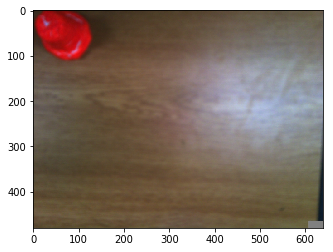

image recieved
pixel count: 11101
centerpoints at: x: 67 y: 51
top left points are: x: 67 y: 51


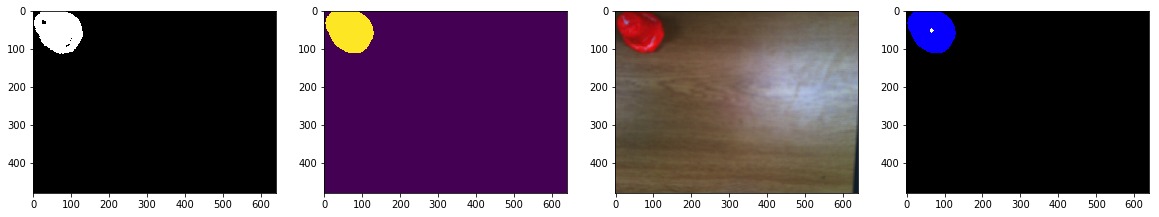

[67, 51]
-0.152220135039
-0.116277687949
moved to init position


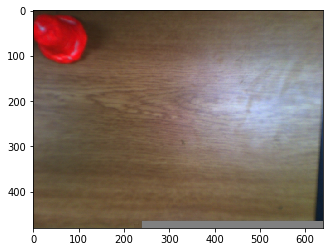

image recieved
pixel count: 10721
centerpoints at: x: 58 y: 60
top left points are: x: 58 y: 60


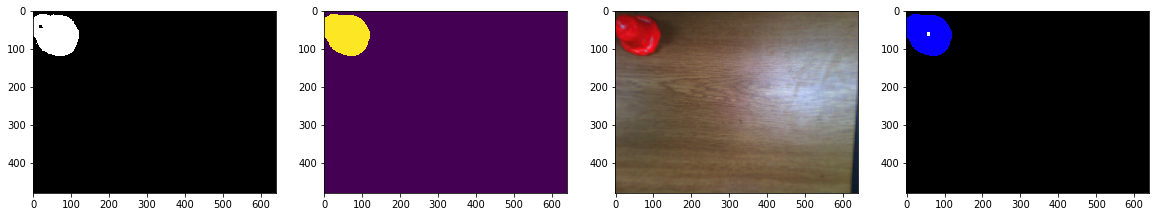

[58, 60]
-0.159775657427
-0.108932041183
moved to init position


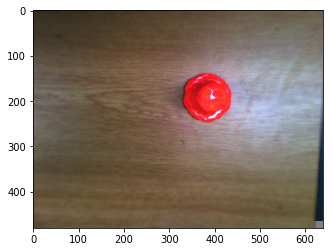

image recieved
pixel count: 8927
centerpoints at: x: 383 y: 191
top left points are: x: 383 y: 191


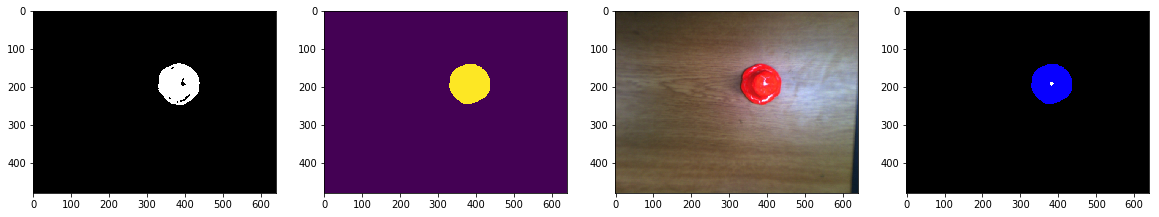

[383, 191]
0.128399781396
0.00021015063571
moved to init position


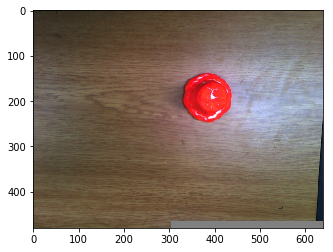

image recieved
pixel count: 8932
centerpoints at: x: 383 y: 191
top left points are: x: 383 y: 191


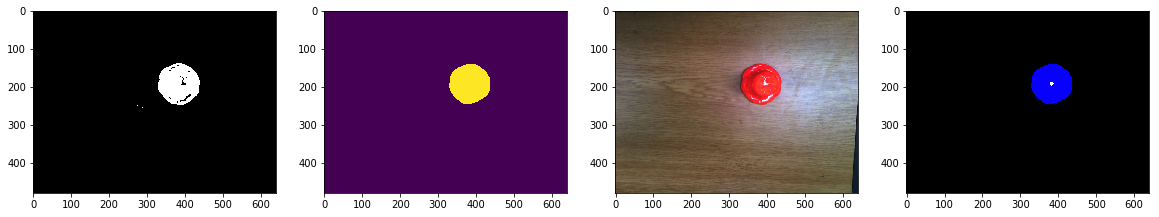

[383, 191]
0.128399781396
0.00021015063571
moved to init position


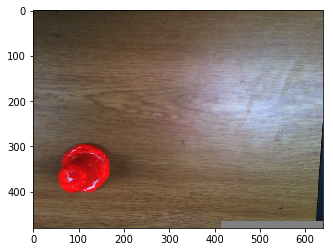

image recieved
pixel count: 9712
centerpoints at: x: 111 y: 349
top left points are: x: 111 y: 349


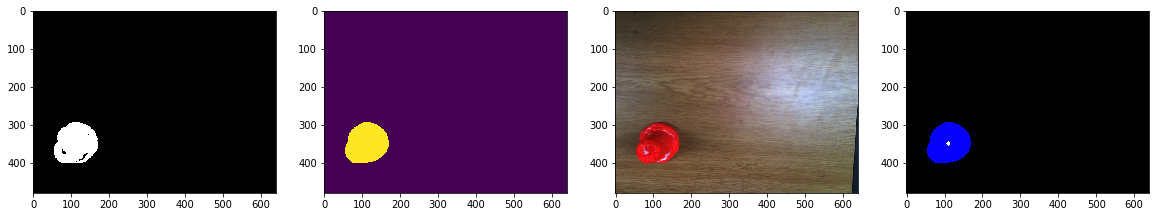

[111, 349]
-0.113589715485
0.132059240562
moved to init position


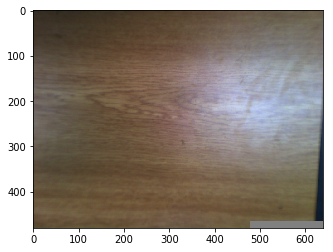

image recieved
pixel count: 0
no more objects in scene of colour: red
finishing program


In [20]:
# just get red
####################
%matplotlib inline

# initalise
rob = rob_connect()
robotiqgrip = Robotiq_Two_Finger_Gripper(rob)
a = 0.7; v = 2

robotiqgrip.open_gripper()
go_to_start(rob)

while True:
    go_to_start(rob)
    time.sleep(2)
    get_image()
    distance = detect_photos('red')
    
    if distance == None:
        print("finishing program")
        break
        
    print(distance)
    [x_dist, y_dist] = find_distance(im_x = distance[0], im_y = distance[1])
    print(x_dist)
    print(y_dist)

    rob.translate(((y_dist)/1.3-0.11, x_dist*1.2, -0.33), acc=a, vel=v)

    robotiqgrip.close_gripper()
    rob.movejs([cam_init_pos, bucket_pos], acc = a, vel = v, radius=0.2)
    robotiqgrip.open_gripper()

In [8]:
%matplotlib inline

# initalise
rob = rob_connect()
robotiqgrip = Robotiq_Two_Finger_Gripper(rob)
a = 0.7; v = 2


#######################################

robotiqgrip.open_gripper()
go_to_start(rob)
[colours, bins] = teach_bins(rob)
i = 0

while True:
    if i == len(colours):
        print("finishing program")
        break
        
    go_to_start(rob)
    time.sleep(1)
    get_image()
    distance = detect_photos(colours[i])
    
    if distance == None:
        i+=1
        continue
        

    [x_dist, y_dist] = find_distance(im_x = distance[0], im_y = distance[1])
    print(x_dist)
    print(y_dist)

    rob.translate((y_dist-0.095, x_dist, -0.33), acc=a, vel=v)

    robotiqgrip.close_gripper()
    rob.movejs([cam_init_pos, bins[i]], acc = a, vel = v, radius=0.2)
    robotiqgrip.open_gripper()




#################3

# pose = rob.getj()
# print(pose)
# # pose[3] = pose[3] - 0.57
# # rob.movel(pose, acc = a, vel = v)

# rob.movel_tool([0, 0, 0, -0.43, 0, 0],acc=a, vel=v)

rob.close()

didnt connect, try again
moved to init position
Please enter the number of bins you have: 1


KeyboardInterrupt: 

In [8]:
## get robot back into init pos
test_robot(a = 1, v = 1)


('robot tcp is at pose: ', [-0.00046760240663701325, -1.6517518202411097, -1.2264254728900355, -1.2764280478106897, -4.723071757947103, 0.0018815234070643783])


In [3]:
def teach_bins(rob):
    '''
    Allows user to move robot to placement of bins
    Also need to allow user to take photo of object!??
    '''
    colours = []
    bins = []
    n_bins = int(raw_input("Please enter the number of bins you have: "))
    for i in range(n_bins):
        rob.set_freedrive(1, timeout=60)
        colours.append(raw_input("Press color of bin when complete: "))
        bins.append(rob.getj())
        
    print("Completed all bins!")
    return [colours, bins]

def get_image():
    '''
    Recieve latest image and save it in a folder
    '''
    
    image_url = "http://192.168.1.6:4242/current.jpg?type=color"
    
    resp = requests.get(image_url, stream=True)
    # Open a local file with wb ( write binary ) permission.
    img_string = 'images/latest_image.jpg'
    local_file = open(img_string, 'wb')
    # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
    resp.raw.decode_content = True
    # Copy the response stream raw data to local image file.
    shutil.copyfileobj(resp.raw, local_file)
    # Remove the image url response object.
    del resp
    
    im = cv2.imread('images/latest_image.jpg')
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.show()
    
    print("image recieved")

def detect_photos(colour):
    '''
    Read in latest image and detect blobs of the given colour
    return the distance to the top left blob in form [X_from_center, Y_from_center] else returns None
    '''
    f = "images/latest_image.jpg"

    # two ranges because red stretchs over the Hue colour range
    
    ##RED
    lower_red_1 = (0,100,50)
    upper_red_1 = (5,255,255)

    lower_red_2 = (170,100,50)
    upper_red_2 = (180,255,255)
    
    ##GREEN
    lower_green = (45, 100, 50)
    upper_green = (65, 255, 255)
    
    ##YELLOW
    lower_yellow = (20, 100, 50)
    upper_yellow = (45, 255, 255)



    # reading in image to RGB and HSV
    img_RGB = cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB)
    img_HSV = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2HSV)

    if colour == 'red':

        # Create two masks
        mask1 = cv2.inRange(img_HSV, lower_red_1, upper_red_1)
        mask2 = cv2.inRange(img_HSV, lower_red_2, upper_red_2)

        # XOR masks
        mask = cv2.bitwise_xor(mask1, mask2)
    elif colour == 'green':
        mask = cv2.inRange(img_HSV, lower_green, upper_green)

    elif colour == 'yellow':
        mask = cv2.inRange(img_HSV, lower_yellow, upper_yellow)


    # bitwise and with image
    result = cv2.bitwise_and(img_HSV, img_HSV, mask=mask)


    # put median blur over the top
    median = cv2.medianBlur(mask,23)

    print("pixel count: " + str(cv2.countNonZero(median)))

    if cv2.countNonZero(median) < 2000:
        print("no more objects in scene of colour: " + colour)
        return None

    # find connected components
    ret, labels = cv2.connectedComponents(median)

    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    #########################################################
    ## Finding Centers!
    ret,thresh = cv2.threshold(median,127,255,0)

    # find contours in the binary image
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    distance_min = 100000
    for c in contours:
        # calculate moments for each contour
        M = cv2.moments(c)

        # calculate x,y coordinate of center
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.circle(labeled_img, (cX, cY), 5, (255, 255, 255), -1)

            distance_new = np.sqrt(cX**2 + cY**2)
            if distance_new < distance_min:
                distance_min = distance_new
                X_top_left = cX
                Y_top_left = cY

            print("centerpoints at: x: " + str(cX) + " y: " + str(cY))

    print("top left points are: x: " + str(X_top_left) + " y: " + str(Y_top_left))

#     X_from_center = X_top_left - (640/2)
#     Y_from_center = Y_top_left - (480/2)

#     print("distance from center: x: " + str(X_from_center) + " y: " + str(Y_from_center))

    # print out figures
    figure = plt.figure(figsize=(20,20))
    plt.subplot(1, 4, 1)
    # mask
    plt.imshow(mask, cmap="gray")
    plt.subplot(1, 4, 2)
    # median blue
    plt.imshow(median)
    #original image
    plt.subplot(1, 4, 3)
    plt.imshow(img_RGB)
    # final 
    plt.subplot(1, 4, 4)
    plt.imshow(labeled_img)

    plt.show()

#     return [X_from_center, Y_from_center]
    return [X_top_left, Y_top_left]

def test_robot(a = 0.2, v = 0.3):
    '''
    Test to see if robot is behaving normally
    '''
    # connecting to robot and initialising gripper
    while(1):
        try:
            rob = urx.Robot("192.168.1.6")
        except:
            print("didnt connect, try again")
            time.sleep(1)
        else:
            break
    
    robotiqgrip = Robotiq_Two_Finger_Gripper(rob)

    robotiqgrip.open_gripper()

    # move to initial position
    rob.movej(cam_init_pos, acc = a, vel = v)


    pose = rob.getj()
    print("robot tcp is at pose: ", pose)

    rob.close()

def go_to_start(rob):
    rob.movej(cam_init_pos, acc = a, vel = v)
    print("moved to init position")
    

def rob_connect():
    while(1):
        try:
            rob = urx.Robot("192.168.1.6")
        except:
            print("didnt connect, try again")
            time.sleep(1)
        else:
            robotiqgrip = Robotiq_Two_Finger_Gripper(rob)
            return rob
    

def find_distance(im_x, im_y):
    '''
    im_x and im_y are pixel values
    
    return values in meters!
    '''
    # getting x and y values for convserion
    x = [0.0, 19.739582451446836, 44.243891701518805, 65.34482466685847, 89.16845865998403, 112.99209265310947, 134.77370087539566, 157.23598435462827, 181.05961834775383, 204.88325234087938, 227.345535820112, 249.8078192993446, 272.2701027785772]
    y = [0.0, 24.50430925007197, 49.00861850014394, 72.83225249326944, 95.29453597250205, 119.79884522257402, 144.30315447264599, 167.44611320882507, 191.95042245889704, 216.454731708969]
    x_neg = 1
    y_neg = 1
    # centering x and y values
    im_x = im_x - 238.79238558052117
    im_y = im_y - 190.74252019167278
    
    # if values are negative
    if (im_x < 0):
        x_neg = -1
        im_x = -im_x
    if (im_y < 0):
        y_neg = -1
        im_y = -im_y
#     print(im_y)
    for x_val in range(len(x) - 1):
        for y_val in range(len(y) - 1):
#             print(x_val, y_val)
            if (im_x > x[x_val] and im_x < x[x_val + 1] and im_y > y[y_val] and im_y < y[y_val + 1]):
#                 print(x[x_val])
#                 print(y[y_val])
                x_dist = (((im_x -  x[x_val])/(x[x_val + 1] - x[x_val]))*2 + x_val*2)/100
                y_dist = (((im_y -  y[y_val])/(y[y_val + 1] - y[y_val]))*2 + y_val*2)/100
#                 print(x_dist)
#                 print(y_dist)
                
                return [x_dist * x_neg, y_dist * y_neg]

In [ ]:
## Mapping of camera coordinates

%matplotlib tk
fig = plt.figure(figsize=(20,30))

rob = rob_connect()
robotiqgrip = Robotiq_Two_Finger_Gripper(rob)
a = 0.5; v = 1


img=mpimg.imread('images/latest_image.jpg')
while True:
    def onclick(event):
        ix, iy = event.xdata, event.ydata
        print(ix, iy)
        [x_dist, y_dist] = find_distance(ix, iy)
        print(x_dist)
        print(y_dist)
        rob.translate((y_dist, x_dist, 0), acc=a, vel=v)
        rob.translate((-0.1, 0, 0), acc=a, vel=v)
        rob.translate((0, 0, -0.33), acc=a, vel=v)
        time.sleep(3)
        go_to_start(rob)


    cid = fig.canvas.mpl_connect('button_press_event', onclick)

    imgplot = plt.imshow(img)
    plt.show()

Exception in thread Thread-33:
Traceback (most recent call last):
  File "C:\Users\61457\Anaconda3\envs\p2\lib\threading.py", line 801, in __bootstrap_inner
    self.run()
  File "C:\Users\61457\Anaconda3\envs\p2\lib\site-packages\urx-0.11.0-py2.7.egg\urx\ursecmon.py", line 289, in run
    data = self._get_data()
  File "C:\Users\61457\Anaconda3\envs\p2\lib\site-packages\urx-0.11.0-py2.7.egg\urx\ursecmon.py", line 336, in _get_data
    tmp = self._s_secondary.recv(1024)
timeout: timed out



In [39]:
find_distance(14, 400)

[-0.1977267224483643, 0.17412572553897177]